In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000

# Features
gesture_accuracy = np.random.uniform(0.5, 1.0, num_samples)  # Gesture accuracy (0.5 - 1.0 scale)
handwriting_accuracy = np.random.uniform(0.5, 1.0, num_samples)  # Handwriting accuracy (0.5 - 1.0 scale)
response_time = np.random.uniform(5, 30, num_samples)  # Response time in seconds

# Confidence score (synthetic logic: higher accuracy and faster time lead to higher confidence)
confidence_score = (
    0.4 * gesture_accuracy +
    0.4 * handwriting_accuracy -
    0.2 * (response_time / 30)
)

# Normalize confidence score between 0 and 1
confidence_score = (confidence_score - confidence_score.min()) / (confidence_score.max() - confidence_score.min())

# Create synthetic dataset
dataset = pd.DataFrame({
    'GestureAccuracy': gesture_accuracy,
    'HandwritingAccuracy': handwriting_accuracy,
    'ResponseTime': response_time,
    'ConfidenceScore': confidence_score
})

# Save dataset to a CSV file
dataset.to_csv('synthetic_confidence_dataset.csv', index=False)
print("Dataset saved as 'synthetic_confidence_dataset.csv'")


Dataset saved as 'synthetic_confidence_dataset.csv'


In [1]:
import pandas as pd

# Load the dataset
file_path = 'synthetic_confidence_dataset.csv'  # Replace with the correct file path if necessary
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Basic statistics
print(data.describe())


   GestureAccuracy  HandwritingAccuracy  ResponseTime  ConfidenceScore
0         0.687270             0.592566     11.542642         0.408425
1         0.975357             0.770950     11.174470         0.765998
2         0.865997             0.936473     27.656365         0.600654
3         0.799329             0.866112     11.238655         0.704005
4         0.578009             0.903281     11.798743         0.557614
       GestureAccuracy  HandwritingAccuracy  ResponseTime  ConfidenceScore
count      1000.000000          1000.000000   1000.000000      1000.000000
mean          0.745128             0.753509     17.560143         0.498088
std           0.146069             0.146095      7.266855         0.180826
min           0.502316             0.501609      5.000291         0.000000
25%           0.617987             0.620537     11.533774         0.368581
50%           0.748404             0.759367     17.515348         0.500450
75%           0.872160             0.880233     2

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = data[['GestureAccuracy', 'HandwritingAccuracy', 'ResponseTime']]
y = data['ConfidenceScore']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 3.071786038924727e-32
R-squared: 1.0


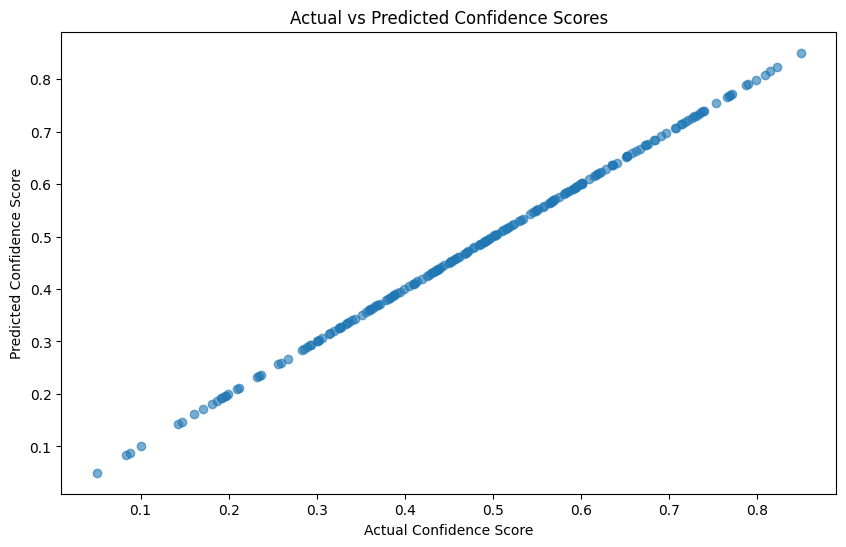

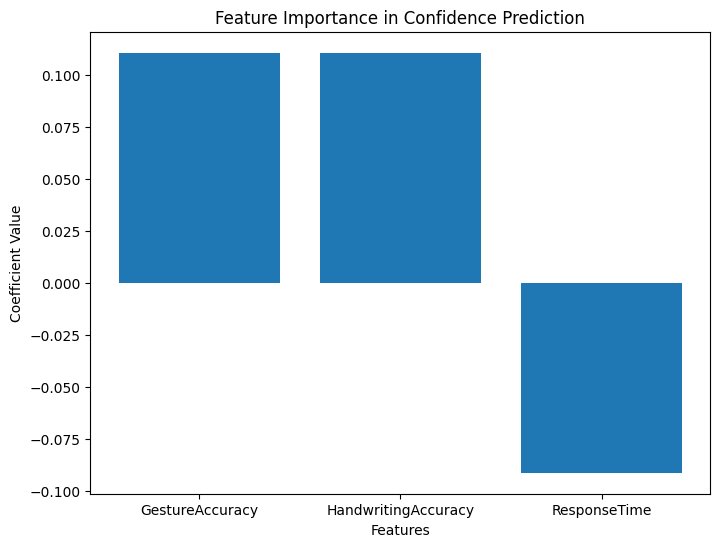

In [4]:
import matplotlib.pyplot as plt

# Compare actual vs predicted confidence scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Confidence Score")
plt.ylabel("Predicted Confidence Score")
plt.title("Actual vs Predicted Confidence Scores")
plt.show()

# Feature importance
coefficients = model.coef_
features = X.columns

plt.figure(figsize=(8, 6))
plt.bar(features, coefficients)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in Confidence Prediction")
plt.show()


In [5]:
# Function to predict confidence score for new input
def predict_confidence(gesture_accuracy, handwriting_accuracy, response_time):
    input_data = [[gesture_accuracy, handwriting_accuracy, response_time]]
    input_scaled = scaler.transform(input_data)
    confidence_score = model.predict(input_scaled)
    return confidence_score[0]

# Example usage
example_confidence = predict_confidence(0.9, 0.85, 10)  # Example input
print(f"Predicted Confidence Score: {example_confidence}")


Predicted Confidence Score: 0.7836011757320429


C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R-squared (R²): 1.0000


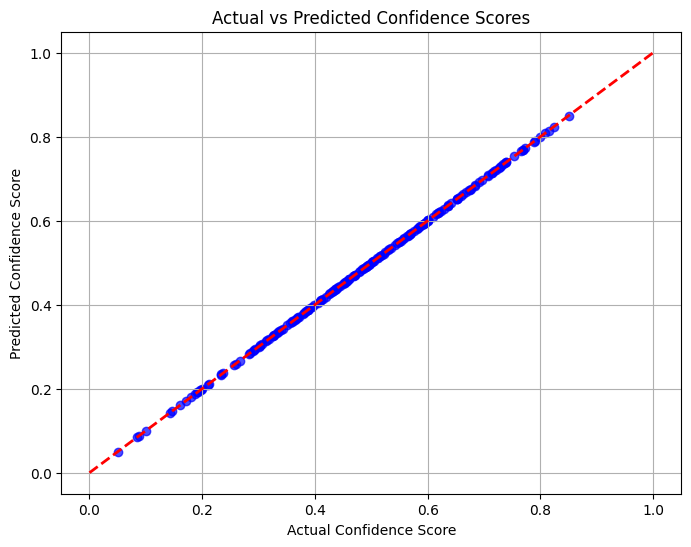

In [7]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([0, 1], [0, 1], '--', color='red', linewidth=2)  # Reference line
plt.xlabel("Actual Confidence Score")
plt.ylabel("Predicted Confidence Score")
plt.title("Actual vs Predicted Confidence Scores")
plt.grid()
plt.show()


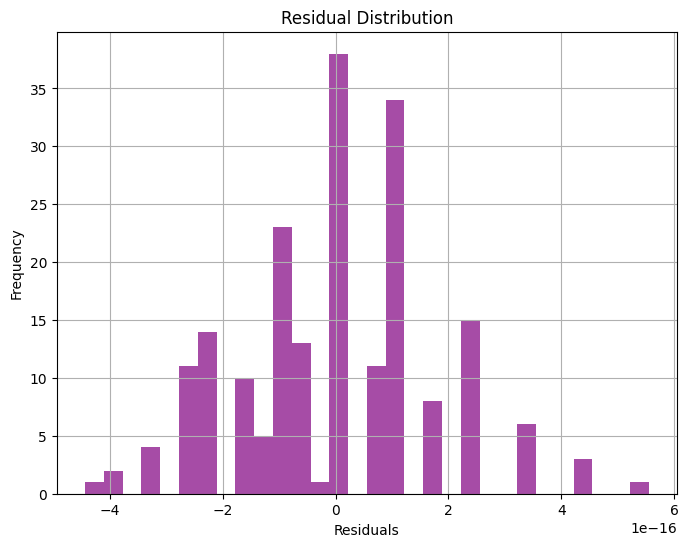

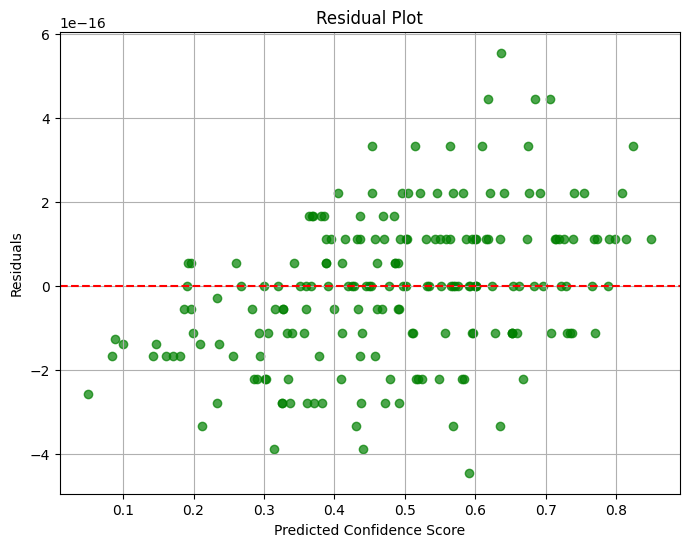

In [8]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='purple', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.grid()
plt.show()

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Confidence Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid()
plt.show()


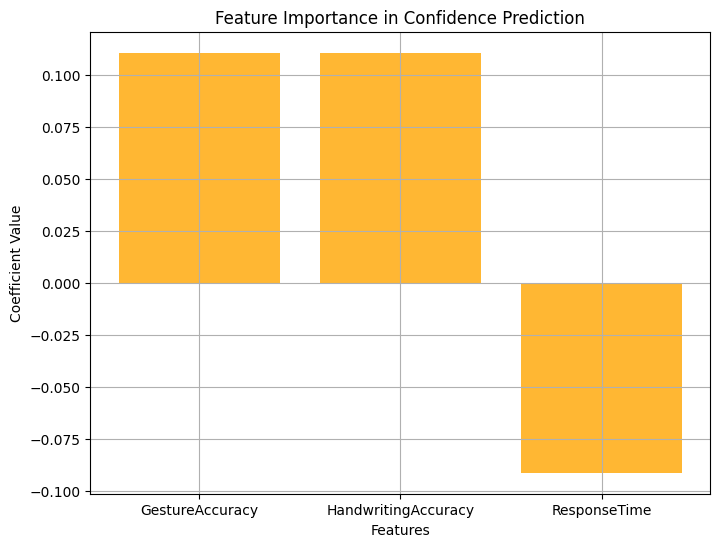

In [9]:
# Feature importance
coefficients = model.coef_
features = X.columns

plt.figure(figsize=(8, 6))
plt.bar(features, coefficients, color='orange', alpha=0.8)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in Confidence Prediction")
plt.grid()
plt.show()


In [10]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Average R² Score: {cv_scores.mean():.4f}")


Cross-Validation R² Scores: [1. 1. 1. 1. 1.]
Average R² Score: 1.0000
